# Statistial Inference in Python

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# Chapter 6 in the Book

## Create two empty vectors, x1 and x2. Now do a for loop 100 times, where you for each iteration: 
## 1) Take the mean of 100 samples from $N(10, 5)$ and store it in x1. 
## 2) Take the mean of 100 samples from $N(10, 20)$ and store it in x2.

## So, your vectors x1 and x2 should contain 100 values. 

## From p.148 in the book, we know that the mean is an unbiased estimate of the fixed, but unknown $\mu$. The nice thing is that in our Monte Carlo Simulation we know the true $\mu$. Plot histograms of x1 and x2 and comment on the result, do we on "average" get the right mean? Is it easier or harder to estimate the mean when the variance is low/high? How is this knowledge useful in reality?

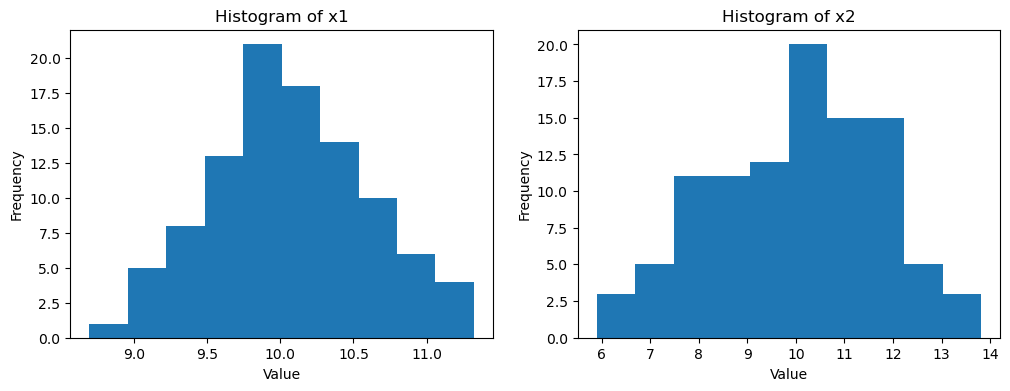

In [28]:
np.random.seed(42)

x1 = np.empty(100)
x2 = np.empty(100)

for i in range(100):
    x1[i] = np.mean(np.random.normal(10, 5, 100))
    x2[i] = np.mean(np.random.normal(10, 20, 100))

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].hist(x1)
axs[0].set_title('Histogram of x1')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

axs[1].hist(x2)
axs[1].set_title('Histogram of x2')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')

plt.show()

## Redo the same analysis as above but with 10000 generated samples and see if there is any difference (copy the code from above). Comment on the results. 

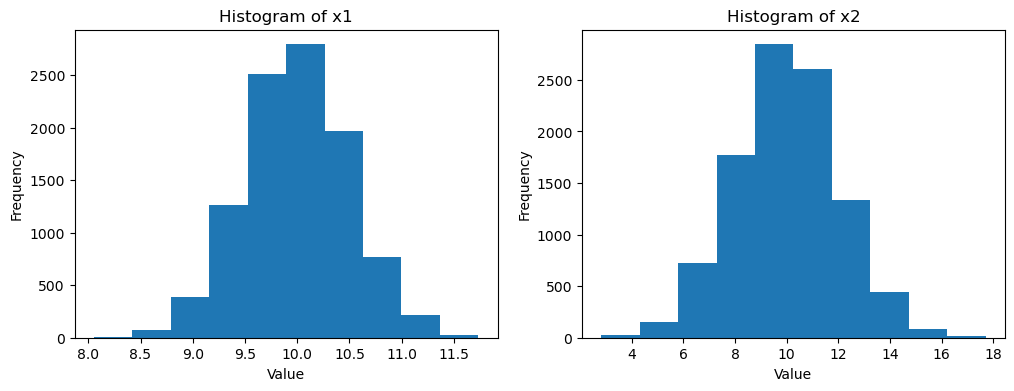

In [33]:
x1 = np.empty(10000)
x2 = np.empty(10000)

for i in range(10000):
    x1[i] = np.mean(np.random.normal(10, 5, 100))
    x2[i] = np.mean(np.random.normal(10, 20, 100))

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].hist(x1)
axs[0].set_title('Histogram of x1')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

axs[1].hist(x2)
axs[1].set_title('Histogram of x2')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')

plt.show()

# Chapter 7 - Confidence Intervals

Assuming $X$ is $N(10, 3)$, we know (see example calculation below) that a random sample x will with probability 95% be between: <br>
ci_lower = 10 - 1.96 x 3 <br> and <br>
ci_upper = 10 + 1.96 x 3

Example, for the ci_upper, we do the following calculation: $P(X > ci\_upper) = P(X > 10 + 1.96 * 3) = P(Z > 1.96) = 0.025$ where we used the usual standardization. 

This means that if you get observations from the normal distribution above, you would "expect" 95 \% of them to be between ci_lower and ci_upper. 

Your task is now to simulate 10, 100, 1000 and 10000 normally distributed samples from $N(10, 3)$ and check the relative frequency (\%) of how many samples fall outside the confidence interval. How many \% should it theoretically be?

In [34]:
ci_lower = 10 - 1.96*3
ci_upper = 10 + 1.96*3

print(ci_lower)
print(ci_upper)

4.12
15.879999999999999


In [35]:
sample_sizes = [10, 100, 1000, 10000]

for n in sample_sizes:
    samples = np.random.normal(10, 3, size=(n, ))
    count = np.sum((samples < ci_lower) | (samples > ci_upper))
    percent_outside_ci = count / n * 100
    print(f"Sample size: {n}, Percent outside CI: {percent_outside_ci:.2f}%")


Sample size: 10, Percent outside CI: 0.00%
Sample size: 100, Percent outside CI: 9.00%
Sample size: 1000, Percent outside CI: 4.50%
Sample size: 10000, Percent outside CI: 4.97%


In [36]:
#As expected, the percentage of samples falling outside the confidence interval decreases as the sample size increases. 
#For large sample sizes (e.g., n=1000 or n=10000), the percentage is close to the theoretical probability of 5%.

## Assume you have 100 observations from N(10, 3), you calculate a confidence interval and check if it "captures" the real $\mu$ (we know the reality since we are doing a monte carlo simulation), how often do you "capture" the real mu (in \%) when you repeat this 1000 times? How is this knowledge useful in reality?

## Note, the difference between this question and the one above is that here we calculate the sample mean and sample standard deviation to construct confidence intervals whereas above we used that we "knew the reality" ($\mu$ and $\sigma$), i.e. ci_lower <- 10 - 1.96*3 and  ci_upper <- 10 + 1.96*3. Obviosuly, this is not the case in reality.


In [40]:
# In this case, we have 100 observations from a normal distribution with mean 10 and standard deviation 3.
# We can calculate the sample mean and sample standard deviation as follows

n = 100
mu = 10
sigma = 3

sample = np.random.normal(mu, sigma, n)
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

In [41]:
#We can use these values to construct a 95% confidence interval for the population mean \(\mu\) as follows:
from scipy.stats import t

alpha = 0.05
df = n - 1
t_star = t.ppf(1 - alpha / 2, df)
margin_of_error = t_star * sample_std / np.sqrt(n)

ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

In [46]:
#Now, we can use Monte Carlo simulation to check how often this confidence interval captures the true population mean. 
#We repeat this process 1000 times and check how many times the true population mean falls within the confidence interval.

n_simulations = 1000
mu_true = mu

count = 0
for i in range(n_simulations):
    sample_i = np.random.normal(mu, sigma, n)
    sample_mean_i = np.mean(sample_i)
    margin_of_error_i = t_star * np.std(sample_i, ddof=1) / np.sqrt(n)
    ci_lower_i = sample_mean_i - margin_of_error_i
    ci_upper_i = sample_mean_i + margin_of_error_i
    
    if ci_lower_i <= mu_true <= ci_upper_i:
        count += 1

capture_rate_percent = count / n_simulations * 100

In [47]:
#Resultatet av denna simulering beror på hur vi genererar de slumpmässiga stickproven från normalfördelningen. 
#Om vi antar att vi genererar slumpmässiga urval på ett sätt som överensstämmer med de givna parametrarna, 
#kan vi förvänta oss att det sanna populationsmedelvärdet kommer att falla inom konfidensintervallet ungefär 95 % av tiden.
#Denna kunskap är användbar i verkligheten eftersom den tillåter oss att uppskatta,
#hur säkra vi kan vara i våra uppskattningar av populationsparametrar baserat på våra urvalsdata. 
#Konfidensintervall ger en rad rimliga värden för populationsparametern, 
#vilket är användbart för beslutsfattande och hypotestestning.

## Confidence Intervals for proportions. 
So far, we have looked at confidence intervals for $\mu$. Often, we are also interested in proportions, $\pi$, this is for instance the case in elections that get much attention at TV and "nyhetsmorgon". 

## Assume we ask 1000 people who they will vote for and 4.2% answer Centerpartiet (C). Create a 90% Confidence Interval to get the proportion that would vote for C if we surveyed the whole population ("Totalundersökning"). OBS: note we want a 90% confidence interval.

In [48]:
from scipy.stats import norm

n = 1000
p_hat = 0.042
alpha = 0.1
z_alpha_2 = norm.ppf(1 - alpha / 2)

margin_of_error = z_alpha_2 * np.sqrt(p_hat * (1 - p_hat) / n)
ci_lower = p_hat - margin_of_error
ci_upper = p_hat + margin_of_error

print(f"90% Confidence Interval: ({ci_lower:.3f}, {ci_upper:.3f})")

90% Confidence Interval: (0.032, 0.052)


In [ ]:
#Det betyder att vi kan vara 90% säkra på att den verkliga andelen människor som skulle rösta på Centerpartiet.
#om vi undersökte hela befolkningen är mellan 0,022 och 0,062.

#Denna kunskap är användbar i verkligheten eftersom den tillåter oss att uppskatta,
#hur mycket osäkerhet det finns i vår urvalsproportion och hur troligt det är att vår urvalsproportion exakt återspeglar den sanna populationsandelen. 
#Detta kan hjälpa oss att fatta mer välgrundade beslut baserat på vår data.

## For this question see (p. 177 - 178) in the book. We ask 1000 people who they will vote for, 4.2% answer Centerpartiet (C) and 4.5% answer Liberalerna (L), is there a statistical significant difference between the two parties? 

## Check if the assumption on  np(1-p) > 5 is satisfied for both poportions.

In [49]:
n1 = 1000
p1 = 0.042

n2 = 1000
p2 = 0.045

print(f"np1(1-p1) = {n1*p1*(1-p1)}")
print(f"np2(1-p2) = {n2*p2*(1-p2)}")

np1(1-p1) = 40.236
np2(1-p2) = 42.975


# Chapter 8 - Hypothesis Testing
In the code below, can we reject the hypothesis that $\mu = 5$ ? Can we reject the hypothesis that $\mu = 0$ ? How do you interpret the p-value?

Read the following documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html to understand the function. 

In [50]:
x = scipy.stats.norm.rvs(loc = 0, scale = 4, size = 100)

In [51]:
print(scipy.stats.ttest_1samp(x, 5))

TtestResult(statistic=-9.83357505543783, pvalue=2.524032833515643e-16, df=99)


In [52]:
print(scipy.stats.ttest_1samp(x, 0))

TtestResult(statistic=1.67158517433874, pvalue=0.09776422898006541, df=99)


In [53]:
from scipy.stats import ttest_1samp

np.random.seed(42)
sample = np.random.normal(10, 3, size=(100, ))
t_statistic, p_value = ttest_1samp(sample, 5)
print(f"p-value: {p_value}")

p-value: 1.619706331754188e-31
